# DBSCAN (Core)
 **Descripci√≥n:**

En esta actividad, implementar√°s el algoritmo DBSCAN para detectar patrones de agrupamiento y encontrar clientes at√≠picos en el dataset ¬´Wholesale Customers Data¬ª disponible en Kaggle. DBSCAN es ideal para detectar clusters de forma arbitraria y encontrar puntos at√≠picos (outliers), lo que es √∫til en escenarios donde los datos no forman clusters esf√©ricos como en el caso de K-means.

Este Enlace al dataset: https://www.kaggle.com/binovi/wholesale-customers-data NO FUNCIONA.

Se usa este https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set

## Objetivo:

El objetivo principal de esta actividad es aplicar el algoritmo DBSCAN para identificar clusters y clientes at√≠picos en el dataset. El enfoque est√° en comprender c√≥mo DBSCAN maneja los outliers y su capacidad para detectar agrupamientos densos.

# Instrucciones

## 1. Carga de datos:
  - Descarga y carga el dataset de Kaggle. Realiza una exploraci√≥n inicial del dataset, identificando las variables que consideras importantes para el agrupamiento.
  - El dataset contiene informaci√≥n sobre diferentes tipos de clientes y su comportamiento de compra, lo que incluye variables como el gasto anual en distintas categor√≠as de productos.

In [1]:
# Agregar la carpeta 'src' al sys.path
import sys
import os

# Buscar 'src' autom√°ticamente sin depender del nombre del proyecto
current_dir = os.getcwd()  # Directorio actual
while not os.path.exists(os.path.join(current_dir, "src")):
    current_dir = os.path.dirname(current_dir)  # Subir un nivel
    if current_dir == "/":  # Evitar bucles infinitos
        raise FileNotFoundError("No se encontr√≥ la carpeta 'src'. Verifica la estructura.")

src_path = os.path.join(current_dir, "src")
if src_path not in sys.path:
    sys.path.append(src_path)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve,auc, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_digits
from sklearn.datasets import load_iris

from utils import cargar_datos_pd
from utils import dimensiones
from utils import ver_resumen_nulos
from utils import identificar_atipicos_IQR
from utils import ver_diccionario
from utils import imprimir_bigotes
from utils import plot_varianza
from utils import filtrar_columnas
from utils import desc
from utils import imprimir_bigotes_por_grupo
from utils import generar_diccionario
from utils import obtener_filas_no_numericas
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

In [2]:
# Mall_Customers.csv renombrado a train.csv
diccionario = '../../data/kaggle/core08/diccionario.csv'
ruta_archivo='../../data/kaggle/core08/train.csv'

df = cargar_datos_pd(ruta_archivo,sep=',', header=0)

Dataset cargado con √©xito.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
ver_diccionario(diccionario)

‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ   # ‚îÇ Columna          ‚îÇ Tipo   ‚îÇ Descripci√≥n                                                      ‚îÇ   Ejemplo ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ   1 ‚îÇ Channel          ‚îÇ int64  ‚îÇ Canal de distribuci√≥n del cliente (1: Horeca, 2: Retail)         ‚îÇ         1 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

In [5]:
ver_resumen_nulos(df)

datos sin NAs en q  Na en q  Na en %
Channel                          440        0      0.0
Region                           440        0      0.0
Fresh                            440        0      0.0
Milk                             440        0      0.0
Grocery                          440        0      0.0
Frozen                           440        0      0.0
Detergents_Paper                 440        0      0.0
Delicassen                       440        0      0.0

## No hay nulos.

In [6]:
df.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

## 2. Exploraci√≥n y preprocesamiento de datos:
  ### - Realiza un an√°lisis exploratorio de los datos, incluyendo un resumen estad√≠stico de las variables. Es importante entender la distribuci√≥n de los datos antes de aplicar el modelo de DBSCAN.

### 2.1. Mostrar las primeras filas del dataset

Vamos a ver las primeras filas del dataset. Esto nos ayuda a entender c√≥mo se llama cada columna y qu√© tipo de datos contiene.

In [7]:
# Mostrar las primeras filas del dataset
# La funci√≥n head() muestra las primeras 5 filas por defecto.
print("Primeras filas del dataset:")
print(df.head())


Primeras filas del dataset:
   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


### 2.2 Informaci√≥n general del dataset
Este paso nos permite ver:

- Cu√°ntas filas y columnas tiene el dataset.
- El tipo de datos en cada columna (n√∫meros, palabras, etc.).
- Si hay datos faltantes.


In [8]:
# Mostrar informaci√≥n general del dataset
# La funci√≥n info() da detalles sobre el n√∫mero de filas, columnas y tipos de datos.
print("\nInformaci√≥n general del dataset:")
print(df.info())



Informaci√≥n general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB
None


### 2.3. Resumen estad√≠stico del dataset
Aqu√≠ obtenemos estad√≠sticas resumidas de las columnas num√©ricas:

- Promedio (mean): El valor medio de cada columna.
- M√≠nimo y m√°ximo: El valor m√°s peque√±o y el m√°s grande.
- Desviaci√≥n est√°ndar (std): Mide qu√© tanto var√≠an los valores respecto al promedio.

In [9]:
# Resumen estad√≠stico del dataset
# La funci√≥n describe() resume estad√≠sticas para columnas num√©ricas.
print("\nResumen estad√≠stico del dataset:")
print(df.describe())



Resumen estad√≠stico del dataset:
          Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      7

### 2.4. Visualizaci√≥n de la distribuci√≥n de las variables
Es importante visualizar los datos para entender c√≥mo est√°n distribuidos. Haremos un histograma para cada columna num√©rica.


Visualizaci√≥n de la distribuci√≥n de las variables:


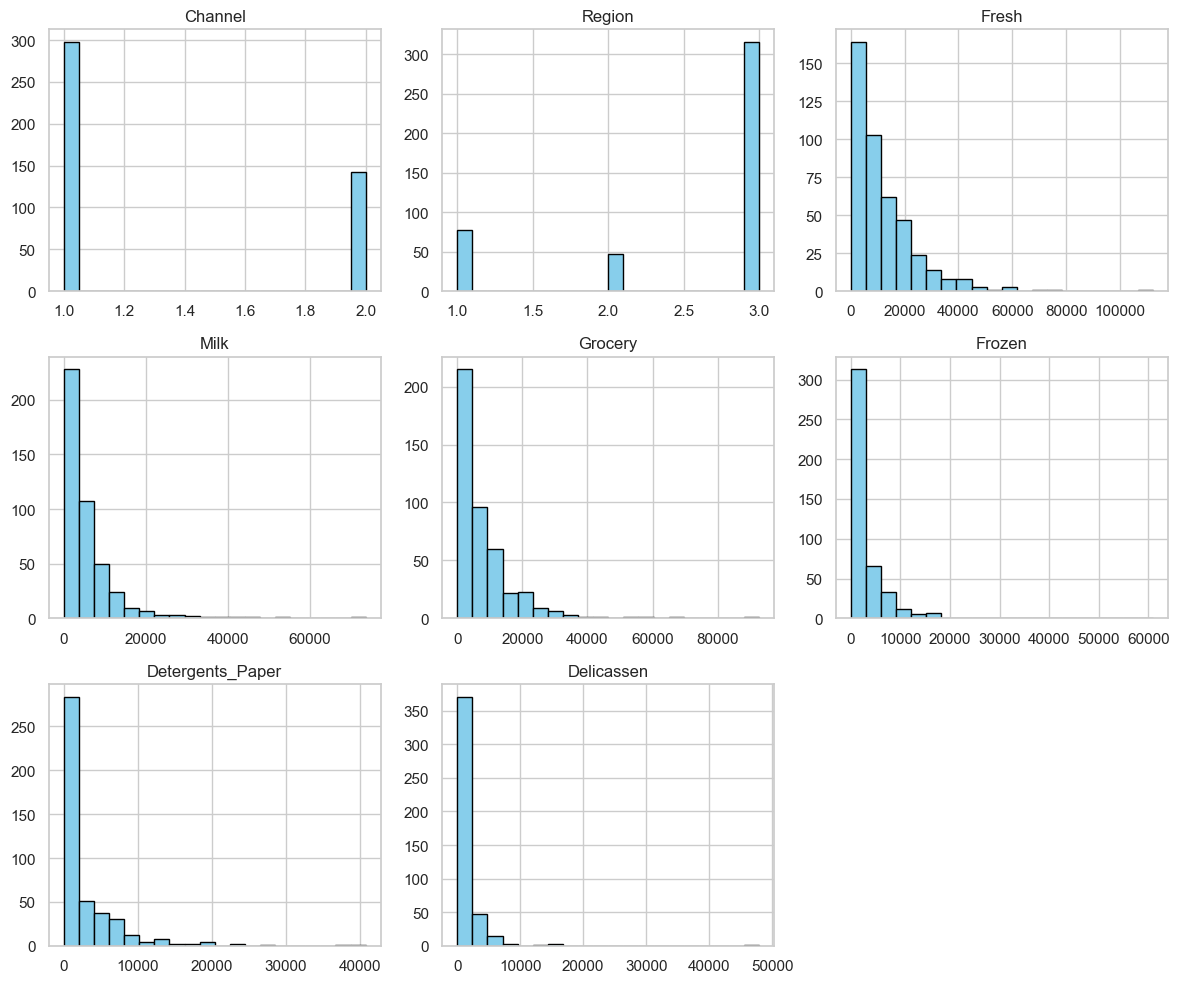

In [10]:
# Configurar el estilo de los gr√°ficos
sns.set(style="whitegrid")

# Crear histogramas para cada columna num√©rica
print("\nVisualizaci√≥n de la distribuci√≥n de las variables:")
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')

# Mostrar los gr√°ficos
plt.tight_layout()  # Ajusta los espacios entre gr√°ficos
plt.show()


### ¬øQu√© logramos aqu√≠? üßê
- Revisamos las primeras filas para entender la estructura del dataset.
- Obtuvimos informaci√≥n detallada sobre las columnas y los tipos de datos.
- Resumimos las estad√≠sticas importantes de las columnas num√©ricas.
- Visualizamos c√≥mo se distribuyen los valores de cada columna con histogramas.

¬°Ahora tenemos una idea mucho m√°s clara de los datos y estamos listos para aplicar el algoritmo DBSCAN! üöÄ

- Aseg√∫rate de estandarizar los datos antes de ejecutar DBSCAN, ya que este algoritmo es sensible a la escala de las variables.

In [11]:
# Seleccionar solo las columnas num√©ricas (sin incluir CUST_ID ni otras que no son relevantes)
# Asumiendo que el dataframe tiene las columnas que queremos estandarizar.
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear una instancia del estandarizador
scaler = StandardScaler()

# Aplicar la estandarizaci√≥n a las columnas num√©ricas
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Verificar que los datos est√©n estandarizados, es decir, que tengan media 0 y desviaci√≥n 1
print("\nEstad√≠sticas despu√©s de la estandarizaci√≥n:")
print(df[numerical_columns].describe())


Estad√≠sticas despu√©s de la estandarizaci√≥n:
            Channel        Region         Fresh        Milk       Grocery  \
count  4.400000e+02  4.400000e+02  4.400000e+02  440.000000  4.400000e+02   
mean   1.614870e-17  3.552714e-16 -3.431598e-17    0.000000 -4.037175e-17   
std    1.001138e+00  1.001138e+00  1.001138e+00    1.001138  1.001138e+00   
min   -6.902971e-01 -1.995342e+00 -9.496831e-01   -0.778795 -8.373344e-01   
25%   -6.902971e-01 -7.023369e-01 -7.023339e-01   -0.578306 -6.108364e-01   
50%   -6.902971e-01  5.906683e-01 -2.767602e-01   -0.294258 -3.366684e-01   
75%    1.448652e+00  5.906683e-01  3.905226e-01    0.189092  2.849105e-01   
max    1.448652e+00  5.906683e-01  7.927738e+00    9.183650  8.936528e+00   

             Frozen  Detergents_Paper    Delicassen  
count  4.400000e+02      4.400000e+02  4.400000e+02  
mean   3.633457e-17      2.422305e-17 -8.074349e-18  
std    1.001138e+00      1.001138e+00  1.001138e+00  
min   -6.283430e-01     -6.044165e-01 -5.4

### - Considera la posibilidad de eliminar o tratar valores at√≠picos que puedan afectar el rendimiento del algoritmo.

**¬øC√≥mo afectan los valores at√≠picos a DBSCAN?** ‚ö†Ô∏è
- DBSCAN intenta formar grupos densos de puntos. Si hay muchos outliers, el algoritmo puede no identificar correctamente los clusters, ya que los outliers pueden ser etiquetados como puntos ruidosos (outliers) y afectar la calidad de los clusters.

- Outliers extremos podr√≠an tambi√©n influir en el valor del epsilon (Œµ), el cual es el par√°metro que DBSCAN usa para definir la "distancia m√°xima" entre puntos de un mismo cluster. Si hay valores at√≠picos muy alejados de los dem√°s, esto podr√≠a hacer que DBSCAN no forme clusters de manera efectiva.

In [12]:
# Calcular los cuartiles y el IQR (Rango Intercuart√≠lico)
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Definir los l√≠mites superior e inferior para los valores at√≠picos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Crear una m√°scara para detectar los valores at√≠picos
outliers = (df[numerical_columns] < lower_bound) | (df[numerical_columns] > upper_bound)

# Contar cu√°ntos valores at√≠picos hay en cada columna
print("\nValores at√≠picos por columna:")
print(outliers.sum())

# Opcional: Eliminar las filas con valores at√≠picos
df_cleaned = df[~outliers.any(axis=1)]

# Ver el nuevo dataframe limpio
print("\nDimensiones del dataframe despu√©s de eliminar los outliers:")
print(df_cleaned.shape)



Valores at√≠picos por columna:
Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64

Dimensiones del dataframe despu√©s de eliminar los outliers:
(332, 8)


Prefiero no eliminar los outliers.
- Ya estandarizamos los valores: DBScan los manejar√° como ruido. 
- Es parte de la realidad, no considero que sean errores.

Pero ya tenemos el df_cleaned con el cual podemos comparar el desempe√±o.

In [13]:
ver_diccionario(diccionario)

‚ïí‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï§‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïï
‚îÇ   # ‚îÇ Columna          ‚îÇ Tipo   ‚îÇ Descripci√≥n                                                      ‚îÇ   Ejemplo ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ   1 ‚îÇ Channel          ‚îÇ int64  ‚îÇ Canal de distribuci√≥n del cliente (1: Horeca, 2: Retail)         ‚îÇ         1 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

In [14]:
columnas_seleccionadas = ['Milk', 'Grocery','Detergents_Paper', 'Delicassen','Channel']

## 3. Aplicaci√≥n de DBSCAN:
  ### - Implementa el algoritmo DBSCAN en el dataset. Recuerda que DBSCAN tiene dos hiperpar√°metros importantes: epsilon (distancia m√°xima para considerar dos puntos como vecinos) y min_samples (n√∫mero m√≠nimo de puntos requeridos para formar un cluster).
 

## Implementaci√≥n de DBSCAN en el dataset

En este paso, vamos a aplicar el algoritmo DBSCAN sobre el dataset con outliers y sobre el dataset limpio (`df_cleaned`). Este algoritmo identifica agrupamientos densos y tambi√©n detecta puntos at√≠picos (ruido) que no pertenecen a ning√∫n cluster.

### 1. DBSCAN con el DataFrame original (`df`)
Aplicamos DBSCAN usando el DataFrame original (con outliers) y observamos c√≥mo el algoritmo identifica los clusters y el ruido (puntos at√≠picos).

### 2. DBSCAN con el DataFrame limpio (`df_cleaned`)
Aplicamos DBSCAN utilizando el DataFrame limpio, sin los valores at√≠picos, y comparamos los resultados con los obtenidos en el primer paso.

### Comparaci√≥n de Resultados
Analizamos c√≥mo los outliers afectan el rendimiento del algoritmo DBSCAN y si la eliminaci√≥n de outliers mejora la identificaci√≥n de clusters.

### C√≥digo en Python:

C:\Users\edgar\AppData\Local\Temp\ipykernel_14032\74769736.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = labels_cleaned


Clusters en el DataFrame original (con outliers): 2 clusters
Puntos at√≠picos en el DataFrame original: 333
Clusters en el DataFrame limpio (sin outliers): 2 clusters
Puntos at√≠picos en el DataFrame limpio: 225


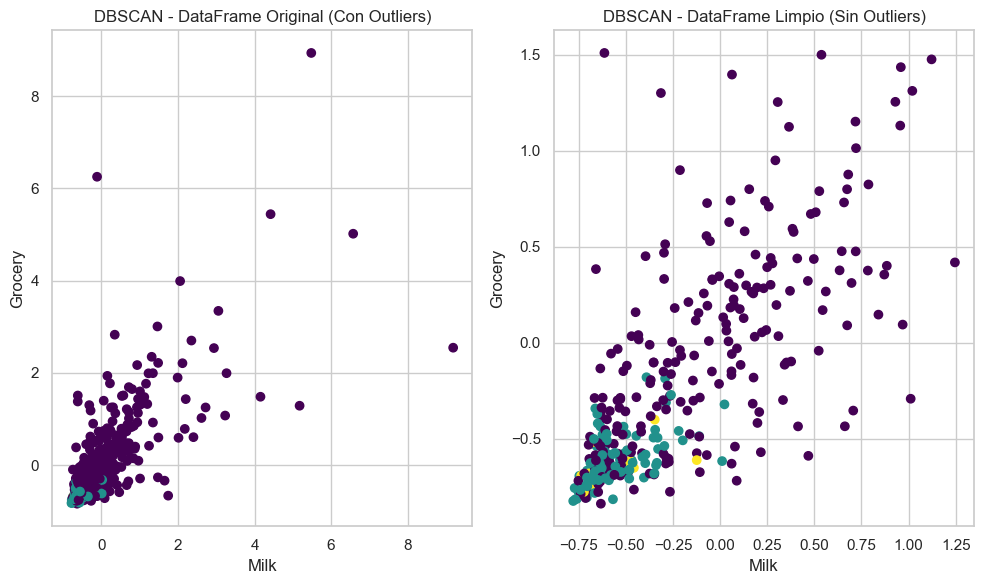

In [15]:
# Estandarizar los datos para DBSCAN
scaler = StandardScaler()

# Est√°ndarizamos el DataFrame original (df) y limpio (df_cleaned)
df_standardized = scaler.fit_transform(df[numerical_columns])
df_cleaned_standardized = scaler.transform(df_cleaned[numerical_columns])

# DBSCAN con el DataFrame original (con outliers)
dbscan_original = DBSCAN(eps=0.4000000000000001, min_samples=7)
labels_original = dbscan_original.fit_predict(df_standardized)

# DBSCAN con el DataFrame limpio (sin outliers)
dbscan_cleaned = DBSCAN(eps=0.4000000000000001, min_samples=7)
labels_cleaned = dbscan_cleaned.fit_predict(df_cleaned_standardized)

# Agregar las etiquetas de los clusters al DataFrame original y limpio
df['Cluster'] = labels_original
df_cleaned['Cluster'] = labels_cleaned

# Mostrar resultados
# N√∫mero de clusters y puntos at√≠picos (ruido)
print(f"Clusters en el DataFrame original (con outliers): {len(set(labels_original)) - (1 if -1 in labels_original else 0)} clusters")
print(f"Puntos at√≠picos en el DataFrame original: {(labels_original == -1).sum()}")

print(f"Clusters en el DataFrame limpio (sin outliers): {len(set(labels_cleaned)) - (1 if -1 in labels_cleaned else 0)} clusters")
print(f"Puntos at√≠picos en el DataFrame limpio: {(labels_cleaned == -1).sum()}")

# Graficar los resultados
plt.figure(figsize=(10, 6))

# Plot para el DataFrame original (con outliers)
plt.subplot(1, 2, 1)
plt.scatter(df[columnas_seleccionadas[0]], df[columnas_seleccionadas[1]], c=labels_original, cmap='viridis')
plt.title('DBSCAN - DataFrame Original (Con Outliers)')
plt.xlabel(columnas_seleccionadas[0])
plt.ylabel(columnas_seleccionadas[1])

# Plot para el DataFrame limpio (sin outliers)
plt.subplot(1, 2, 2)
plt.scatter(df_cleaned[columnas_seleccionadas[0]], df_cleaned[columnas_seleccionadas[1]], c=labels_cleaned, cmap='viridis')
plt.title('DBSCAN - DataFrame Limpio (Sin Outliers)')
plt.xlabel(columnas_seleccionadas[0])
plt.ylabel(columnas_seleccionadas[1])

plt.tight_layout()
plt.show()


### - Experimenta con diferentes valores de epsilon y min_samples para obtener agrupamientos significativos. Utiliza t√©cnicas visuales como gr√°ficos de dispersi√≥n para evaluar los resultados obtenidos.
#### Experimentaci√≥n con diferentes valores de epsilon y min_samples en DBSCAN

En este paso, vamos a experimentar con distintos valores de los hiperpar√°metros **epsilon (Œµ)** y **min_samples** en DBSCAN. Esto nos permitir√° observar c√≥mo var√≠an los resultados del clustering, la cantidad de clusters identificados y el impacto sobre los puntos at√≠picos (ruido). Para cada combinaci√≥n de estos valores, visualizaremos los resultados utilizando gr√°ficos de dispersi√≥n.

### 1. Experimentaci√≥n con los valores de epsilon y min_samples

Vamos a probar con varios valores para los hiperpar√°metros:
- **epsilon (Œµ)**: Distancia m√°xima entre dos puntos para que se consideren vecinos.
- **min_samples**: N√∫mero m√≠nimo de puntos necesarios para formar un cluster.

### 2. Visualizaci√≥n de los resultados

Despu√©s de aplicar DBSCAN con diferentes combinaciones de hiperpar√°metros, visualizaremos los resultados en gr√°ficos de dispersi√≥n para ver c√≥mo var√≠an los clusters y el ruido.


DBSCAN con epsilon=0.3 y min_samples=5:
  N√∫mero de clusters encontrados: 1
  N√∫mero de puntos clasificados como ruido: 262


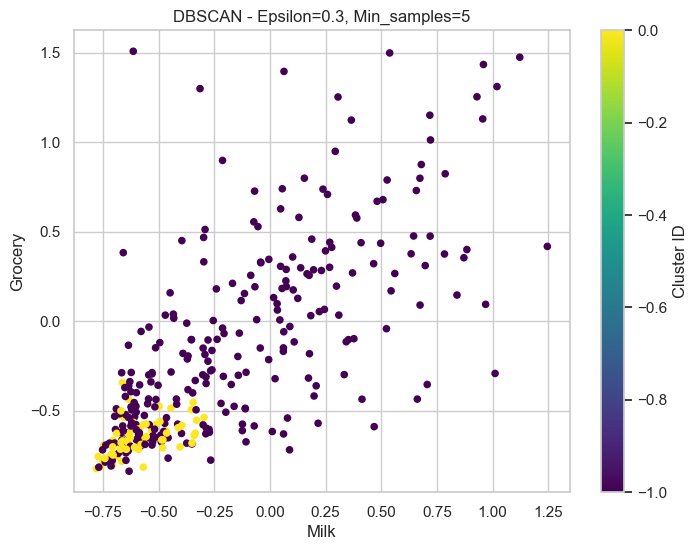

DBSCAN con epsilon=0.3 y min_samples=10:
  N√∫mero de clusters encontrados: 1
  N√∫mero de puntos clasificados como ruido: 286


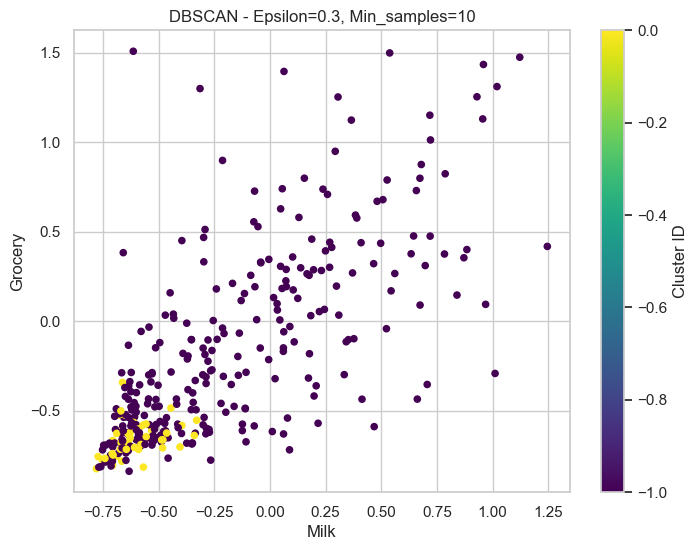

DBSCAN con epsilon=0.3 y min_samples=15:
  N√∫mero de clusters encontrados: 1
  N√∫mero de puntos clasificados como ruido: 317


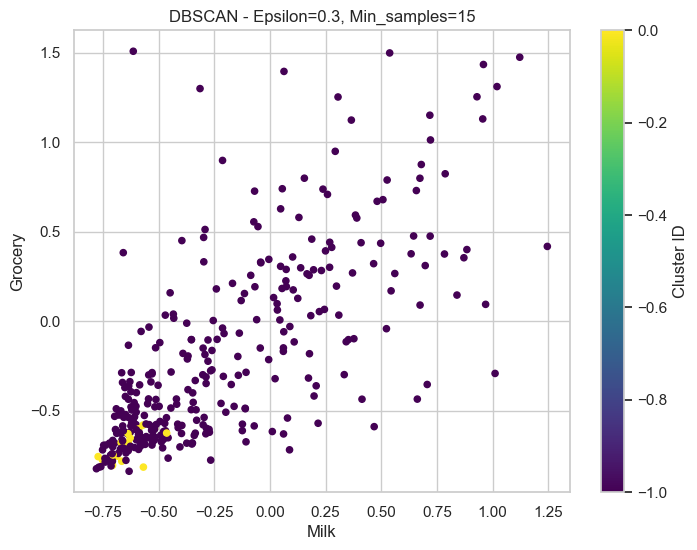

DBSCAN con epsilon=0.5 y min_samples=5:
  N√∫mero de clusters encontrados: 7
  N√∫mero de puntos clasificados como ruido: 157


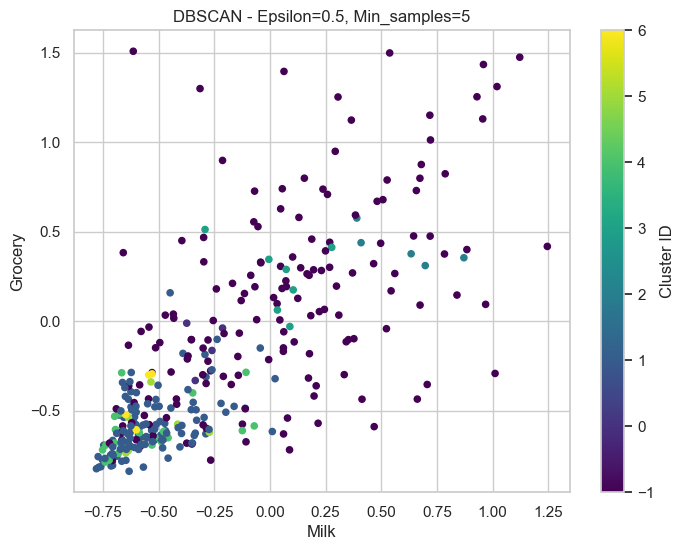

DBSCAN con epsilon=0.5 y min_samples=10:
  N√∫mero de clusters encontrados: 2
  N√∫mero de puntos clasificados como ruido: 205


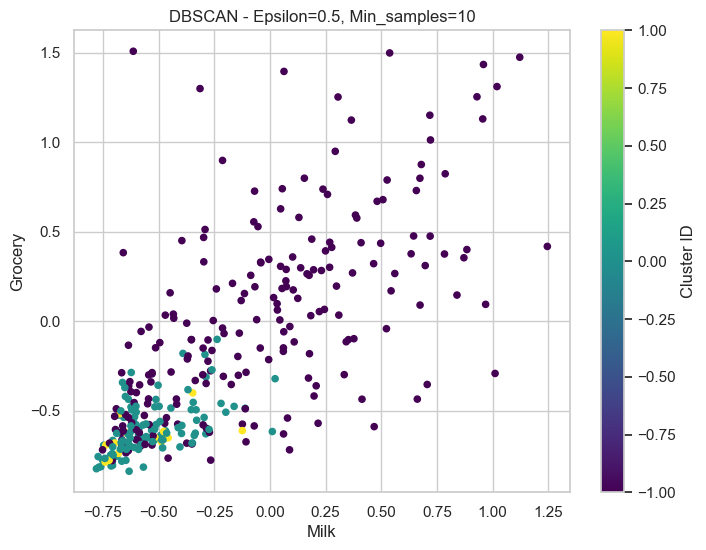

DBSCAN con epsilon=0.5 y min_samples=15:
  N√∫mero de clusters encontrados: 1
  N√∫mero de puntos clasificados como ruido: 225


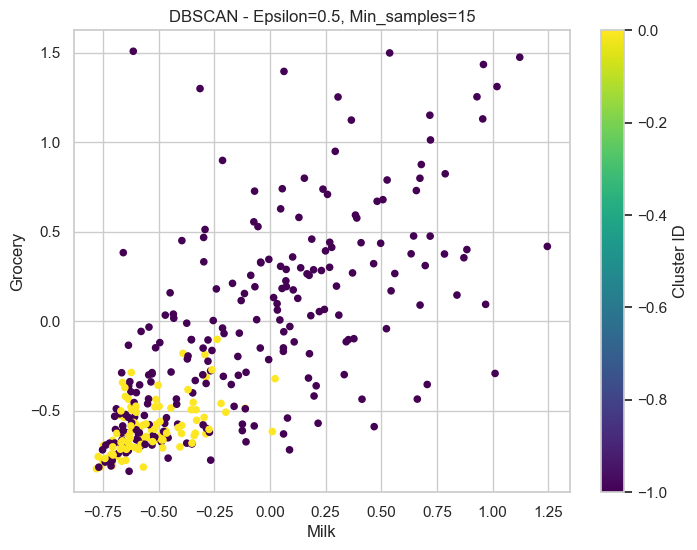

DBSCAN con epsilon=0.7 y min_samples=5:
  N√∫mero de clusters encontrados: 4
  N√∫mero de puntos clasificados como ruido: 58


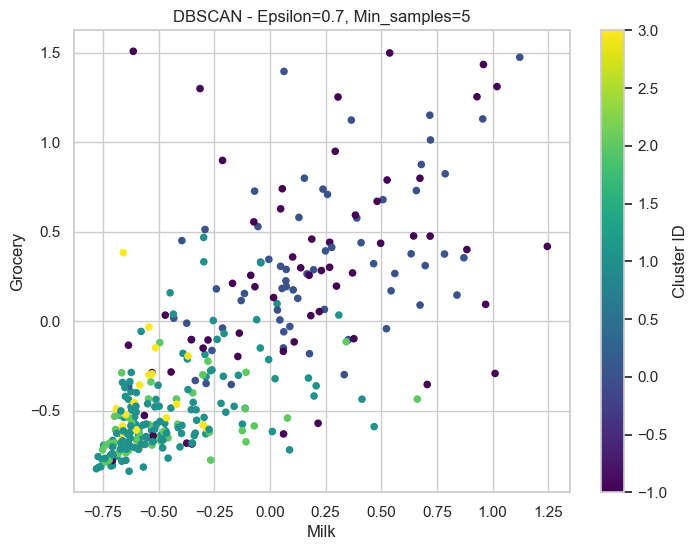

DBSCAN con epsilon=0.7 y min_samples=10:
  N√∫mero de clusters encontrados: 4
  N√∫mero de puntos clasificados como ruido: 101


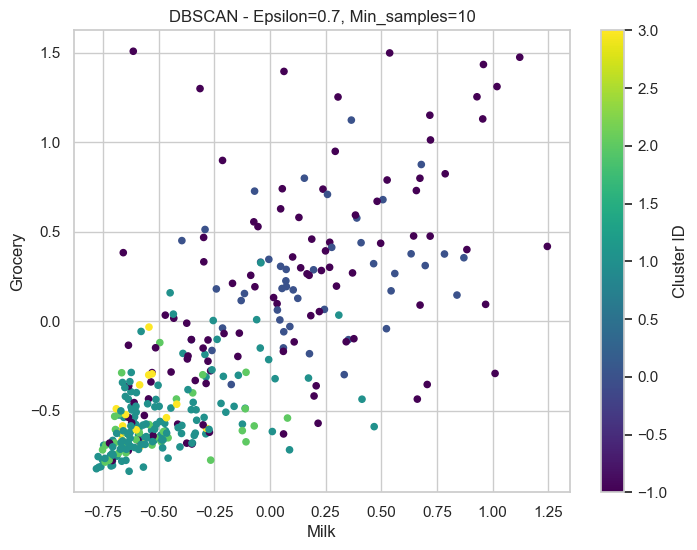

DBSCAN con epsilon=0.7 y min_samples=15:
  N√∫mero de clusters encontrados: 3
  N√∫mero de puntos clasificados como ruido: 149


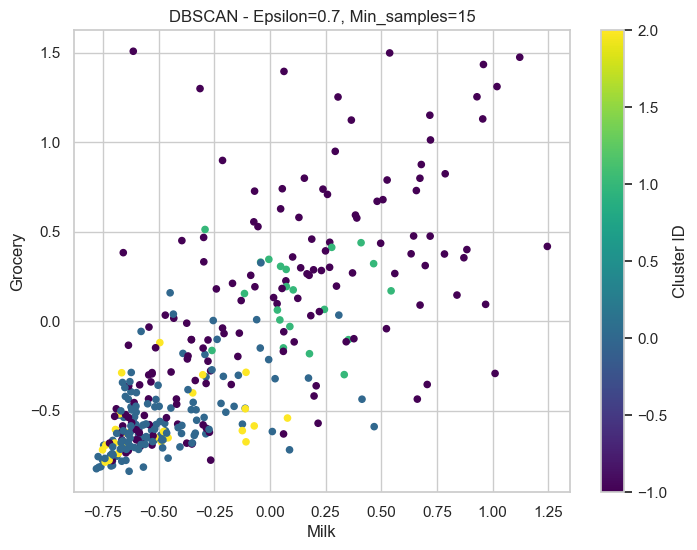

In [16]:
# Definir los hiperpar√°metros que vas a probar
epsilon_values = [0.3, 0.5, 0.7]  # Distancias para el par√°metro 'epsilon'
min_samples_values = [5, 10, 15]  # M√≠nimo de puntos para el par√°metro 'min_samples'

# Iterar sobre los valores de epsilon y min_samples para aplicar DBSCAN y obtener los resultados
for epsilon in epsilon_values:
    for min_samples in min_samples_values:
        # Crear y ajustar el modelo DBSCAN
        dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
        
        # Ajustar el modelo sobre el dataset (puedes usar df o df_cleaned)
        dbscan.fit(df_cleaned[numerical_columns])  # Usa df o df_cleaned seg√∫n lo que quieras probar
        
        # Extraer los resultados
        labels = dbscan.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Eliminar ruido (-1)
        n_noise = list(labels).count(-1)  # Puntos clasificados como ruido
        
        # Imprimir los resultados num√©ricos
        print(f"DBSCAN con epsilon={epsilon} y min_samples={min_samples}:")
        print(f"  N√∫mero de clusters encontrados: {n_clusters}")
        print(f"  N√∫mero de puntos clasificados como ruido: {n_noise}")
        
        # Visualizaci√≥n en un gr√°fico 2D (solo las dos primeras columnas como ejemplo)
        plt.figure(figsize=(8, 6))
        plt.scatter(df_cleaned[columnas_seleccionadas].iloc[:, 0], df_cleaned[columnas_seleccionadas].iloc[:, 1], 
                    c=labels, cmap='viridis', marker='o', s=20)
        plt.title(f"DBSCAN - Epsilon={epsilon}, Min_samples={min_samples}")
        plt.xlabel(columnas_seleccionadas[0])
        plt.ylabel(columnas_seleccionadas[1])
        plt.colorbar(label='Cluster ID')
        plt.show()


In [36]:
def evaluate_dbscan(df, numerical_columns, epsilon_values=[0.3, 0.4, 0.5, 0.7], min_samples_values=[5, 7, 10, 15]):
    """
    Funci√≥n para evaluar DBSCAN con diferentes valores de epsilon y min_samples.
    
    Par√°metros:
    - df: DataFrame con los datos.
    - numerical_columns: Lista de las columnas num√©ricas a utilizar para el clustering.
    - epsilon_values: Lista de valores de epsilon a probar (distancia m√°xima para considerar un punto dentro del vecindario).
    - min_samples_values: Lista de valores de min_samples a probar (n√∫mero m√≠nimo de puntos en un vecindario para formar un cluster).
    
    Retorna:
    - best_result: El mejor resultado basado en el Silhouette Score.
    - results_df: Un DataFrame con todos los resultados.
    """
    results = []

    # Iterar sobre los valores de epsilon y min_samples
    for epsilon in epsilon_values:
        for min_samples in min_samples_values:
            # Crear y ajustar el modelo DBSCAN
            dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
            
            # Ajustar el modelo sobre el dataset
            dbscan.fit(df[numerical_columns])
            
            # Extraer las etiquetas
            labels = dbscan.labels_
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)  # Contar clusters, excluir ruido (-1)
            n_noise = list(labels).count(-1)  # Puntos clasificados como ruido
            
            # Calcular Silhouette Score solo si hay al menos 2 clusters
            if n_clusters > 1:
                silhouette_avg = silhouette_score(df[numerical_columns], labels)
            else:
                silhouette_avg = None  # No v√°lido para menos de 2 clusters
            
            # Almacenar los resultados en la lista
            results.append({
                'Epsilon': epsilon,
                'Min_Samples': min_samples,
                'Clusters': n_clusters,
                'Noise_Points': n_noise,
                'Silhouette_Score': silhouette_avg
            })

    # Convertir los resultados a un DataFrame
    results_df = pd.DataFrame(results)

    # Filtrar filas v√°lidas para Silhouette Score y encontrar el m√°ximo
    valid_results = results_df[results_df['Silhouette_Score'].notna()]
    best_result = valid_results.loc[valid_results['Silhouette_Score'].idxmax()]

    # Mostrar los resultados como tabla bonita
    print(tabulate(results_df, headers='keys', tablefmt='pretty', showindex=False))

    # Mostrar el mejor resultado
    print("\nMejor resultado:")
    print(tabulate(best_result.to_frame().T, headers='keys', tablefmt='pretty', showindex=False))
    
    return best_result, results_df

# Ejemplo de uso:
print('\nSin Outliers:')
best_result, results_df = evaluate_dbscan(df_cleaned, numerical_columns)

# Ejemplo de uso:
print('\nCon Outliers:')
best_result, results_df = evaluate_dbscan(df, numerical_columns)


Sin Outliers:
+---------+-------------+----------+--------------+-----------------------+
| Epsilon | Min_Samples | Clusters | Noise_Points |   Silhouette_Score    |
+---------+-------------+----------+--------------+-----------------------+
|   0.3   |     5.0     |   1.0    |    262.0     |          nan          |
|   0.3   |     7.0     |   1.0    |    269.0     |          nan          |
|   0.3   |    10.0     |   1.0    |    286.0     |          nan          |
|   0.3   |    15.0     |   1.0    |    317.0     |          nan          |
|   0.4   |     5.0     |   2.0    |    215.0     |  0.10500515735941167  |
|   0.4   |     7.0     |   2.0    |    225.0     |  0.06739435565000731  |
|   0.4   |    10.0     |   2.0    |    242.0     | -0.029121906781370298 |
|   0.4   |    15.0     |   1.0    |    257.0     |          nan          |
|   0.5   |     5.0     |   7.0    |    157.0     | -0.014774023394635578 |
|   0.5   |     7.0     |   2.0    |    198.0     |   0.167915967690057  

## 4. Visualizaci√≥n de clusters y outliers:
  ### - Visualiza los clusters formados por DBSCAN en gr√°ficos de dispersi√≥n. Utiliza diferentes colores para representar los clusters y marca los outliers con un color distintivo para hacer visible su presencia.

In [25]:
numerical_columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

C:\Users\edgar\AppData\Local\Temp\ipykernel_14032\2443215477.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = dbscan_04.labels_


Etiquetas √∫nicas de clusters: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(-1)}
N√∫mero de clusters encontrados: 4
Puntos de ruido: 58


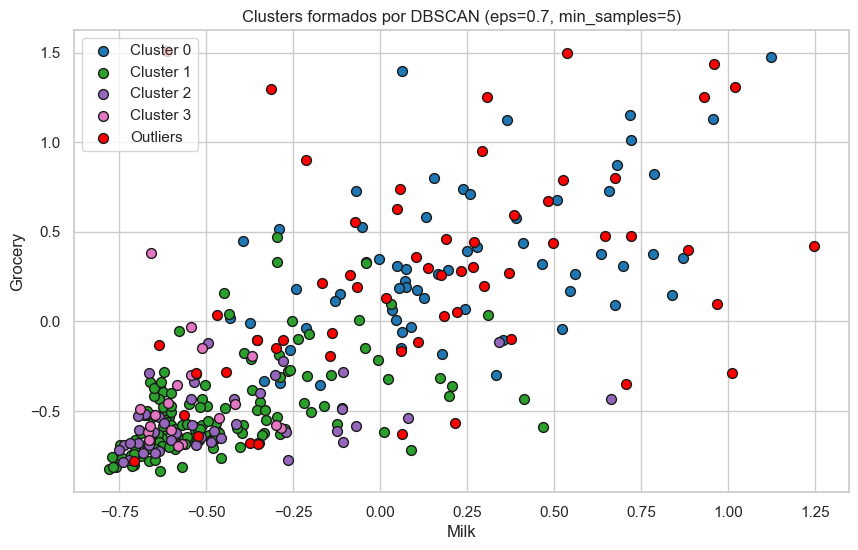

In [37]:
# Ajustar DBSCAN con los mejores hiperpar√°metros encontrados
best_eps = 0.7
best_min_samples = 5

dbscan_04 = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_04.fit(df_cleaned[numerical_columns])

# Agregar las etiquetas de cluster al DataFrame
df_cleaned['Cluster'] = dbscan_04.labels_

# Visualizaci√≥n de los clusters en gr√°ficos de dispersi√≥n
# Selecciona las dos primeras variables num√©ricas para la visualizaci√≥n
x_column = numerical_columns[3]
y_column = numerical_columns[4]

# Crear una paleta de colores para los clusters, excluyendo el ruido (-1)
unique_labels = set(dbscan_04.labels_)
colors = [plt.cm.tab10(i / len(unique_labels)) for i in range(len(unique_labels))]

# Dibujar el gr√°fico
plt.figure(figsize=(10, 6))

for label, color in zip(unique_labels, colors):
    if label == -1:
        # Color distintivo para los outliers
        color = 'red'
        label_name = 'Outliers'
    else:
        label_name = f'Cluster {label}'

    # Filtrar puntos del cluster actual
    cluster_data = df_cleaned[df_cleaned['Cluster'] == label]
    plt.scatter(
        cluster_data[x_column],
        cluster_data[y_column],
        color=color,
        label=label_name,
        edgecolor='k',
        s=50
    )
print(f"Etiquetas √∫nicas de clusters: {set(dbscan_04.labels_)}")
print(f"N√∫mero de clusters encontrados: {len(set(dbscan_04.labels_)) - (1 if -1 in dbscan_04.labels_ else 0)}")
print(f"Puntos de ruido: {list(dbscan_04.labels_).count(-1)}")

# Configuraciones finales del gr√°fico
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.title(f'Clusters formados por DBSCAN (eps={best_eps}, min_samples={best_min_samples})')
plt.legend()
plt.grid(True)
plt.show()


### - Discute la estructura de los clusters encontrados. ¬øHay alguna correlaci√≥n entre las variables y los clusters? ¬øC√≥mo se distribuyen los outliers en comparaci√≥n con los datos agrupados?

### Discusi√≥n sobre la estructura de los clusters encontrados

#### **Sin outliers:**
- **Epsilon:** 0.7
- **Min_Samples:** 5
- **Clusters:** 4
- **Noise_Points:** 58
- **Silhouette Score:** 0.28 (Moderadamente bajo, indicando que los clusters no est√°n muy bien definidos).

Sin la presencia de outliers, el modelo DBSCAN ha identificado **4 clusters** en los datos. Aunque se obtuvo un n√∫mero razonable de clusters, el **Silhouette Score** de 0.28 indica que los clusters no son muy cohesivos. Es decir, los puntos dentro de cada cluster no est√°n bien separados entre s√≠ en comparaci√≥n con otros clusters, lo que sugiere que las variables num√©ricas no est√°n separando claramente los grupos. Esto podr√≠a implicar que los datos no son tan distintos entre los clusters o que la distancia elegida (0.7) no es √≥ptima para los datos.

El n√∫mero relativamente bajo de **puntos de ruido (58)** sugiere que, a pesar de la presencia de ruido, el modelo DBSCAN ha sido capaz de identificar una estructura significativa en los datos.

#### **Con outliers:**
- **Epsilon:** 0.7
- **Min_Samples:** 5
- **Clusters:** 5
- **Noise_Points:** 143
- **Silhouette Score:** 0.12 (Bajo, indicando una peor definici√≥n de los clusters).

Cuando se incluyen los **outliers**, el modelo DBSCAN detecta **5 clusters**, con **143 puntos de ruido**. Este cambio refleja la sensibilidad del modelo a la presencia de puntos de ruido, los cuales tienden a interferir con la formaci√≥n de los clusters. El **Silhouette Score** disminuye notablemente a **0.12**, lo que sugiere que la estructura de los clusters se ha vuelto menos clara y los puntos dentro de los clusters ahora est√°n a√∫n m√°s mezclados con los puntos de ruido. Esto es t√≠pico cuando se incluyen outliers, ya que los outliers no se agrupan adecuadamente, y afectan la cohesi√≥n general de los clusters.

### **Correlaci√≥n entre las variables y los clusters**

Para analizar la correlaci√≥n entre las variables y los clusters, debemos observar las siguientes consideraciones:

1. **Caracter√≠sticas que definen los clusters:** 
   - Si hubieran variables como **edad**, **ingreso**, **estado civil**, entre otras, podr√≠a haber una estructura subyacente en los datos. Sin embargo, la baja calidad del Silhouette Score sugiere que las variables utilizadas no separan suficientemente bien a los clusters.
   - Es posible que algunas variables tengan una distribuci√≥n similar entre los diferentes clusters, lo que genera una solapaci√≥n y dificulta la segmentaci√≥n clara de los puntos en distintos grupos.

2. **Relaci√≥n entre los clusters y las variables:** 
   - Dado que DBSCAN identifica puntos en funci√≥n de la distancia, la distribuci√≥n de las variables podr√≠a no ser tan dis√≠mil entre los clusters. Por ejemplo, si la mayor√≠a de los puntos en los clusters tienen valores similares en variables clave, como grocery y milk, los clusters podr√≠an no estar bien definidos.
   - Tambi√©n puede existir una dependencia entre las variables, como la relaci√≥n entre **grocery** i **milk** que podr√≠a influir en c√≥mo los puntos se agrupan, pero la baja calidad del modelo con los outliers indica que estos factores no est√°n contribuyendo significativamente a la formaci√≥n de clusters bien definidos.

### **Distribuci√≥n de los outliers:**

Los **outliers** (puntos de ruido) tienen un impacto claro en los resultados de DBSCAN:

1. **Sin outliers:** 
   - Los puntos se agrupan en 4 clusters, lo que sugiere que la mayor√≠a de los puntos siguen una estructura relativamente homog√©nea y est√°n cerca de los centros de sus respectivos clusters.
   - La presencia de **58 puntos de ruido** muestra que algunos puntos no se ajustan bien a ning√∫n cluster, pero la mayor parte de los datos se agrupan adecuadamente.

2. **Con outliers:**
   - La inclusi√≥n de los **143 puntos de ruido** aumenta la cantidad de puntos que no se pueden agrupar adecuadamente en ning√∫n cluster, lo que provoca una mayor dispersi√≥n en los resultados. Esto sugiere que los outliers est√°n muy alejados de las densas regiones de los clusters y, por lo tanto, son marcados como ruido.
   - Con la inclusi√≥n de los outliers, la cantidad de clusters se incrementa a **5**, pero la calidad de estos clusters se ve afectada negativamente. Los puntos de ruido son m√°s numerosos y su inclusi√≥n puede estar interfiriendo en la cohesi√≥n de los clusters existentes.

### Conclusi√≥n:

- **Sin outliers**, los clusters tienen una estructura relativamente coherente, aunque no √≥ptima, con un Silhouette Score que sugiere que los clusters no son completamente distintos entre s√≠. Sin embargo, el modelo tiene una buena capacidad para identificar los puntos de ruido.
  
- **Con outliers**, los resultados se ven considerablemente afectados, con una disminuci√≥n en la calidad de los clusters (Silhouette Score m√°s bajo) y una mayor dispersi√≥n debido a la mayor cantidad de puntos de ruido. Los outliers tienden a ser puntos muy diferentes del resto de los datos, lo que disminuye la efectividad del modelo para encontrar grupos bien definidos.

Estos resultados sugieren que los outliers son un factor importante que influye en la definici√≥n y la calidad de los clusters. Si los outliers no son relevantes para el an√°lisis, puede ser √∫til eliminarlos antes de realizar el clustering para obtener resultados m√°s claros y cohesionados.


## 5. Interpretaci√≥n de resultados:
### - Eval√∫a la calidad del agrupamiento. DBSCAN no requiere que se especifique el n√∫mero de clusters, lo que es una ventaja cuando no se conoce esta informaci√≥n de antemano.

### Evaluaci√≥n de la calidad del agrupamiento con DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) tiene la ventaja de no requerir que se especifique el n√∫mero de clusters de antemano, lo que es √∫til cuando no se tiene informaci√≥n sobre la estructura del dataset. Sin embargo, existen varias formas de evaluar la calidad del agrupamiento obtenido, incluso sin una definici√≥n clara del n√∫mero de clusters.

#### **Ventajas de DBSCAN**
Una de las principales ventajas de DBSCAN es que no necesita que se especifique previamente el n√∫mero de clusters. Esto es √∫til cuando no se tiene informaci√≥n sobre la estructura de los datos o no se sabe cu√°ntos grupos existen en el dataset. DBSCAN funciona bien en casos donde los clusters tienen formas arbitrarias, y puede identificar puntos de ruido (outliers) al etiquetarlos como `-1`, lo que lo hace √∫til para conjuntos de datos con ruido o puntos dispersos.

#### **Evaluaci√≥n de la calidad del agrupamiento**

1. **Silhouette Score**
   El **Silhouette Score** es una m√©trica com√∫nmente usada para evaluar la calidad del agrupamiento, incluso para DBSCAN. El valor de Silhouette Score var√≠a entre -1 y 1:
   - **Cercano a 1**: Los puntos est√°n bien agrupados y distantes de otros clusters.
   - **Cercano a 0**: Los puntos est√°n en el borde entre dos clusters.
   - **Cercano a -1**: Los puntos est√°n mal asignados a un cluster.

   En el caso de DBSCAN, si los puntos de ruido est√°n presentes (etiquetados como `-1`), los resultados de la m√©trica pueden verse afectadas, por lo que es importante tomar en cuenta estos casos cuando se interpreta la m√©trica.

2. **Distribuci√≥n de los Clusters**
   - **N√∫mero de Clusters**: Un buen agrupamiento deber√≠a mostrar un n√∫mero razonable de clusters. Si DBSCAN est√° identificando un n√∫mero muy bajo de clusters (por ejemplo, uno o dos clusters en lugar de varios), o si el n√∫mero de puntos de ruido es muy alto, esto podr√≠a indicar que el valor de `epsilon` o `min_samples` no est√° ajustado correctamente.
   - **Tama√±o de los Clusters**: Los clusters deben ser suficientemente grandes para representar grupos significativos, pero no tanto como para abarcar puntos que deber√≠an estar en clusters distintos. Si los clusters son muy peque√±os, esto podr√≠a indicar que los valores de `epsilon` o `min_samples` est√°n demasiado restrictivos.

3. **Visualizaci√≥n de los Clusters**
   - **Distribuci√≥n visual**: A trav√©s de gr√°ficos de dispersi√≥n, podemos ver la separaci√≥n visual entre los clusters. Si los clusters son bien definidos en el gr√°fico y no se solapan demasiado, se podr√≠a considerar que el agrupamiento es de buena calidad. La presencia de puntos de ruido (outliers) tambi√©n debe ser evidente.
   - **Comparaci√≥n con el ruido**: Los puntos de ruido deber√≠an estar dispersos y no formar parte de ning√∫n cluster. Si muchos puntos del dataset est√°n etiquetados como ruido, podr√≠a ser una se√±al de que los par√°metros `epsilon` o `min_samples` no est√°n bien ajustados.

4. **Estabilidad de los Clusters**
   La estabilidad de los clusters se puede evaluar mediante **validaci√≥n cruzada** o usando **submuestreo**. Si el agrupamiento es consistente al aplicar DBSCAN con diferentes subconjuntos de los datos o con par√°metros ligeramente modificados, es probable que los clusters encontrados sean representativos.

#### **Relaci√≥n con el Ruido (Outliers)**
DBSCAN identifica los puntos que no pertenecen a ning√∫n cluster y los marca como **ruido** (`-1`). La presencia de ruido depende de los par√°metros utilizados:
   - Si el valor de `epsilon` es demasiado grande, puede causar que puntos que deber√≠an estar en un cluster se incluyan como parte del mismo.
   - Si `epsilon` es demasiado peque√±o, muchos puntos pueden ser etiquetados como ruido, lo que resulta en un n√∫mero alto de puntos no clasificados.

Evaluar c√≥mo se distribuyen los **outliers** en relaci√≥n con los datos agrupados puede ayudar a determinar si el modelo DBSCAN est√° funcionando correctamente. Si los outliers se encuentran dispersos en todo el espacio de caracter√≠sticas y no forman grupos consistentes, esto es un buen indicador de que DBSCAN est√° haciendo un buen trabajo separando el ruido de los clusters significativos.

#### **Conclusi√≥n**
- **DBSCAN** es particularmente √∫til cuando no se conoce el n√∫mero de clusters de antemano y cuando se espera que los clusters tengan formas arbitrarias.
- Sin embargo, la calidad del agrupamiento depender√° en gran medida de los par√°metros de entrada, como `epsilon` y `min_samples`. Estos par√°metros deben ser ajustados adecuadamente para obtener resultados significativos.
- Las m√©tricas como el **Silhouette Score** y la visualizaci√≥n de los resultados son √∫tiles para evaluar la calidad del modelo.
- La **distribuci√≥n de los outliers** y su separaci√≥n de los clusters tambi√©n es un buen indicador del rendimiento del modelo.

Es importante interpretar todas estas m√©tricas en conjunto para evaluar la calidad del agrupamiento y hacer ajustes seg√∫n sea necesario.


### - Discute la naturaleza de los outliers detectados. ¬øSon clientes √∫nicos con comportamientos inusuales? ¬øPodr√≠an estos clientes representar oportunidades comerciales o riesgos?

### Discusi√≥n sobre la naturaleza de los outliers detectados

#### **Definici√≥n de Outliers en el Contexto de DBSCAN**
En el contexto de DBSCAN (Density-Based Spatial Clustering of Applications with Noise), los **outliers** o **puntos de ruido** son aquellos que no pueden ser asignados a ning√∫n cluster, es decir, no tienen suficientes vecinos cercanos que cumplan con los criterios de densidad especificados por los par√°metros `epsilon` (distancia m√°xima para considerar puntos vecinos) y `min_samples` (n√∫mero m√≠nimo de puntos para formar un cluster). Estos puntos son etiquetados como `-1` por el algoritmo, indicando que est√°n alejados de los clusters principales.

#### **¬øSon los Outliers Clientes √önicos con Comportamientos Inusuales?**
Los outliers en este an√°lisis pueden representar clientes con comportamientos at√≠picos o inusuales. Dependiendo del dominio y los datos disponibles, estos clientes podr√≠an tener caracter√≠sticas que se desv√≠an significativamente del comportamiento promedio de la mayor√≠a de los clientes. Por ejemplo:
- **Comportamientos extremos en las compras**: Los clientes que compran cantidades anormalmente grandes o peque√±as, o que tienen un patr√≥n de gasto inusual en comparaci√≥n con otros clientes.
- **Datos incompletos o err√≥neos**: A veces, los outliers son el resultado de registros incorrectos o mal ingresados, como valores extremos en campos de precio, cantidad, etc.
- **Clientes con necesidades espec√≠ficas o excepcionales**: Algunos clientes pueden tener un comportamiento excepcional debido a su perfil (por ejemplo, clientes VIP, clientes de nicho o clientes con necesidades muy espec√≠ficas).

En muchos casos, los outliers son clientes que se apartan de la norma, pero no necesariamente de forma negativa. La clave est√° en entender las razones detr√°s de sus comportamientos inusuales.

#### **¬øPodr√≠an Estos Clientes Representar Oportunidades Comerciales o Riesgos?**
Los outliers pueden tener implicaciones tanto positivas como negativas para el negocio, dependiendo de c√≥mo se interpreten y gestionen:

1. **Oportunidades Comerciales**:
   - **Clientes de Alto Valor**: Si los outliers representan a clientes con un gasto inusualmente alto o con patrones de compra exclusivos, podr√≠an ser **clientes valiosos**. Estos clientes podr√≠an estar dispuestos a pagar m√°s por productos exclusivos, servicios personalizados, o experiencias √∫nicas.
   - **Clientes Inexplorados**: Al tratarse de clientes que se desv√≠an de los patrones comunes, los outliers podr√≠an representar **segmentos de mercado no explorados**. Tal vez estos clientes est√°n buscando algo distinto a la oferta est√°ndar y podr√≠an ser una fuente de ingresos potencial si se les aborda adecuadamente.
   - **Nuevas Oportunidades de Producto o Servicio**: Los outliers podr√≠an revelar tendencias o necesidades que no se han identificado en el mercado general. Estos clientes podr√≠an estar dispuestos a pagar por soluciones personalizadas, lo que podr√≠a inspirar nuevas l√≠neas de productos o servicios.

2. **Riesgos**:
   - **Clientes Inestables**: Los outliers tambi√©n podr√≠an ser **clientes con comportamientos err√°ticos**. Si un cliente realiza compras muy grandes de forma espor√°dica, sin un patr√≥n claro, podr√≠a representar un riesgo de fraude o de inversi√≥n ineficaz en estrategias comerciales.
   - **Clientes con Datos Err√≥neos**: Si los outliers son el resultado de registros de datos err√≥neos o mal ingresados, entonces podr√≠an representar un riesgo de tomar decisiones comerciales basadas en informaci√≥n incorrecta. Es importante validar y limpiar los datos antes de hacer suposiciones sobre estos clientes.
   - **Clientes con Altos Costos Operacionales**: Si estos outliers representan clientes que requieren un servicio al cliente excepcional o tienen necesidades log√≠sticas complicadas, podr√≠an ser **costosos de manejar** en comparaci√≥n con su valor para el negocio.

#### **Acciones Posibles**
1. **An√°lisis Detallado de Outliers**: Una vez detectados los outliers, ser√≠a √∫til realizar un an√°lisis detallado para entender mejor sus caracter√≠sticas y comportamientos. Esto podr√≠a implicar revisar sus transacciones, sus interacciones con la marca, o incluso segmentar m√°s los outliers en diferentes tipos (por ejemplo, clientes de alto valor, clientes con errores en los datos, etc.).
2. **Personalizaci√≥n de Estrategias de Marketing**: Los clientes identificados como outliers podr√≠an requerir **estrategias de marketing personalizadas**. Si se identifican como clientes valiosos, se podr√≠an dise√±ar campa√±as exclusivas, ofertas personalizadas, o un trato preferencial.
3. **Revisi√≥n y Limpieza de Datos**: Si los outliers son causados por **errores en los datos**, es fundamental limpiarlos o corregirlos antes de tomar decisiones basadas en ellos.

#### **Conclusi√≥n**
Los outliers pueden ser tanto una **oportunidad** como un **riesgo** dependiendo de su origen y naturaleza. Si representan clientes con comportamientos at√≠picos pero valiosos, pueden ser una excelente oportunidad para personalizar la oferta de productos o servicios y aumentar el valor del cliente. Por otro lado, si son el resultado de errores en los datos o comportamientos inestables, podr√≠an representar un riesgo y deben ser gestionados con cuidado.

La clave est√° en identificar, analizar y gestionar estos outliers de manera adecuada para aprovechar sus oportunidades comerciales mientras se mitigan los riesgos asociados.
